# Petrol Consumption
For the given dataset, predict the co-relation between petrol consumption and different features affecting it.

*Criteria: Low RMSE to pass.*

# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing

In [2]:
df = pd.read_csv('petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
X = df.iloc[: , : -1].values
y = df.iloc[: ,  -1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model of choice
The model of choice for this challenge will be a decision tree Regressor. The reason behind this is simple. The decision tree model is well adapted to higher dimensional datasets, and additionally no preprocessing is needed.

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

# Calculating The Loss after training
The loss after training is calculated through Root mean squared error function, which is a cost function.
Basically:
$$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} – \hat{y_{i}})^{2}}$$
The RMSE of a model determines the absolute fit of the model to the data. In other words, it indicates how close the actual data points are to the model’s predicted values. A low value of RMSE indicates a better fit and is a good measure for determining the accuracy of the model’s predictions.

In [14]:
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))

In [15]:
print(f'RMSE: ', rmse)

RMSE:  67.345


# Visualising the decision tree
Decision trees in higher dimensions are generally not visualizable. However, there is a function in the sklearn.tree module which does that. We will use that function to visualize the entire decision tree which our model built and used.

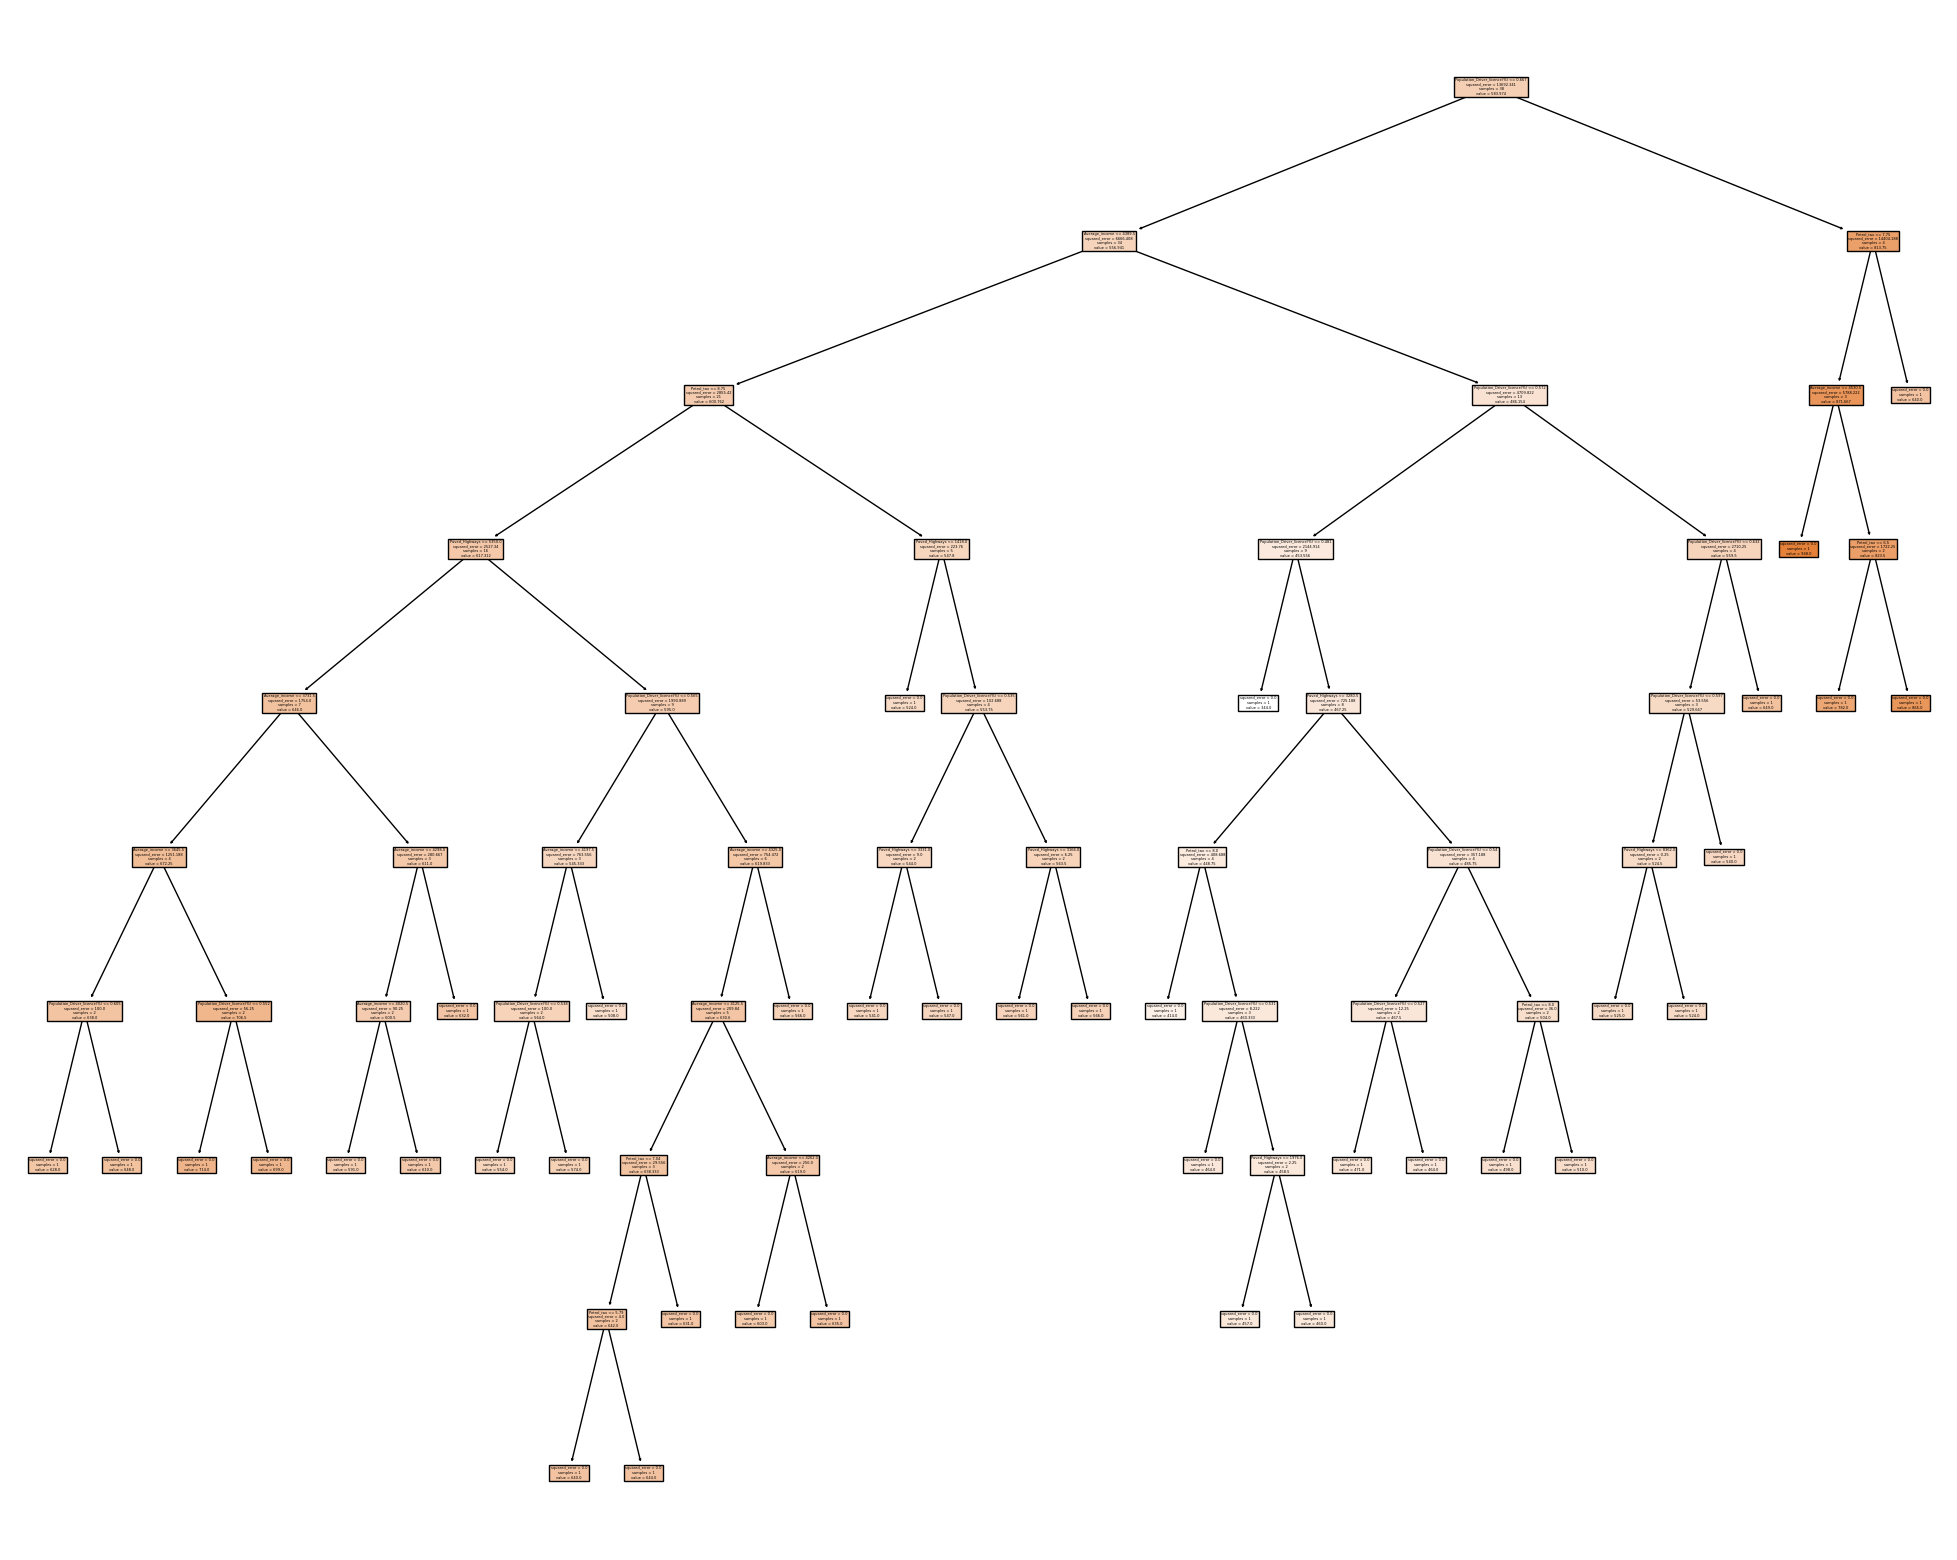

In [25]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor,
                   feature_names=['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)'],
                   filled=True)
fig.savefig("decision_tree.pdf")